#XGBoost (Extreme Gradient Boosting), 

- uno de los algoritmos de machine learning de tipo supervisado más usados en la actualidad.

- Se caracteriza por obtener buenos resultados de predicción con relativamente poco esfuerzo, en muchos casos equiparables o mejores que los devueltos por modelos más complejos computacionalmente, en particular para problemas con datos heterogéneos.


introducción (informal)

**XGBoost** Extreme Gradient Boosting es un algoritmo predictivo supervisado que utiliza el principio de *boosting*.

La idea detrás del boosting es generar múltiples modelos de predicción “débiles” secuencialmente, y que cada uno de estos tome los resultados del modelo anterior, para generar un modelo más “fuerte”, con mejor poder predictivo y mayor estabilidad en sus resultados.

Para conseguir un modelo más fuerte a partir de estos modelos débiles, se emplea un algoritmo de optimización, este caso Gradient Descent (descenso de gradiente).

*Durante el entrenamiento, los parámetros de cada modelo débil son ajustados iterativamente tratando de encontrar el mínimo de una función objetivo, que puede ser la proporción de error en la clasificación, el área bajo la curva (AUC), la raíz del error cuadrático medio (RMSE) o alguna otra*.

Cada modelo es comparado con el anterior. Si un nuevo modelo tiene mejores resultados, entonces se toma este como base para realizar modificaciones. Si, por el contrario, tiene peores resultados, se regresa al mejor modelo anterior y se modifica ese de una manera diferente. Qué tan grandes son los ajustes de un modelo a otro es uno de los hiper parámetros que debe definir el usuario.

Este proceso se repite hasta llegar a un punto en el que la diferencia entre modelos consecutivos es insignificante, lo cual nos indica que hemos encontrado el mejor modelo posible, o cuando se llega al número de iteraciones máximas definido por el usuario.

XGBoost usa como sus modelos débiles árboles de decisión de diferentes tipos, que pueden ser usados para tareas de clasificación y de regresión.

- https://projecteuclid.org/download/pdf_1/euclid.aos/1013203451

- 

# XGBOOST


- $X_1$=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- $X_2$=the house age (unit: year)
- $X_3$=the distance to the nearest MRT station (unit: meter)
- $X_4$=the number of convenience stores in the living circle on foot (integer)
- $X_5$=the geographic coordinate, latitude. (unit: degree)
- $X_6$=the geographic coordinate, longitude. (unit: degree)

- $Y$= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

Fuente: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set



https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx"

In [4]:
data= pd.read_excel(url)
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


cual es el nombre de las columnas

In [5]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

Eliminamos la variable `"No"`

In [6]:
data.shape


(414, 8)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Choosing features : Feature Selection


In [8]:
data=data.drop(['No', "X1 transaction date"], axis=1)

In [9]:
data.columns


Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [10]:
data.columns = ['Edad_casa','Distancia_MRT','Numero_Tiendas','Latitud','Longitud','Precio']

In [11]:
data.head(10)

,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
5,7.1,2175.03000,3,24.96305,121.51254,32.1
6,34.5,623.47310,7,24.97933,121.53642,40.3
7,20.3,287.60250,6,24.98042,121.54228,46.7
8,31.7,5512.03800,1,24.95095,121.48458,18.8
9,17.9,1783.18000,3,24.96731,121.51486,22.1


In [12]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 74.6 MB/s eta 0:00:00


In [13]:
import sweetviz as sv

In [14]:
reporte=sv.analyze(data, "Precio")

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



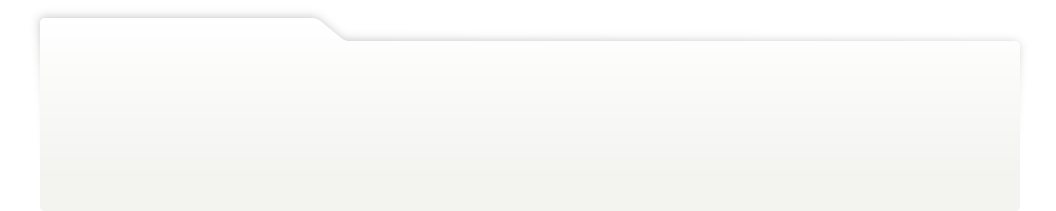
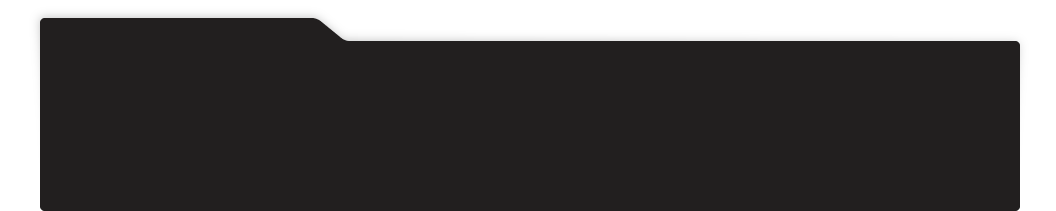
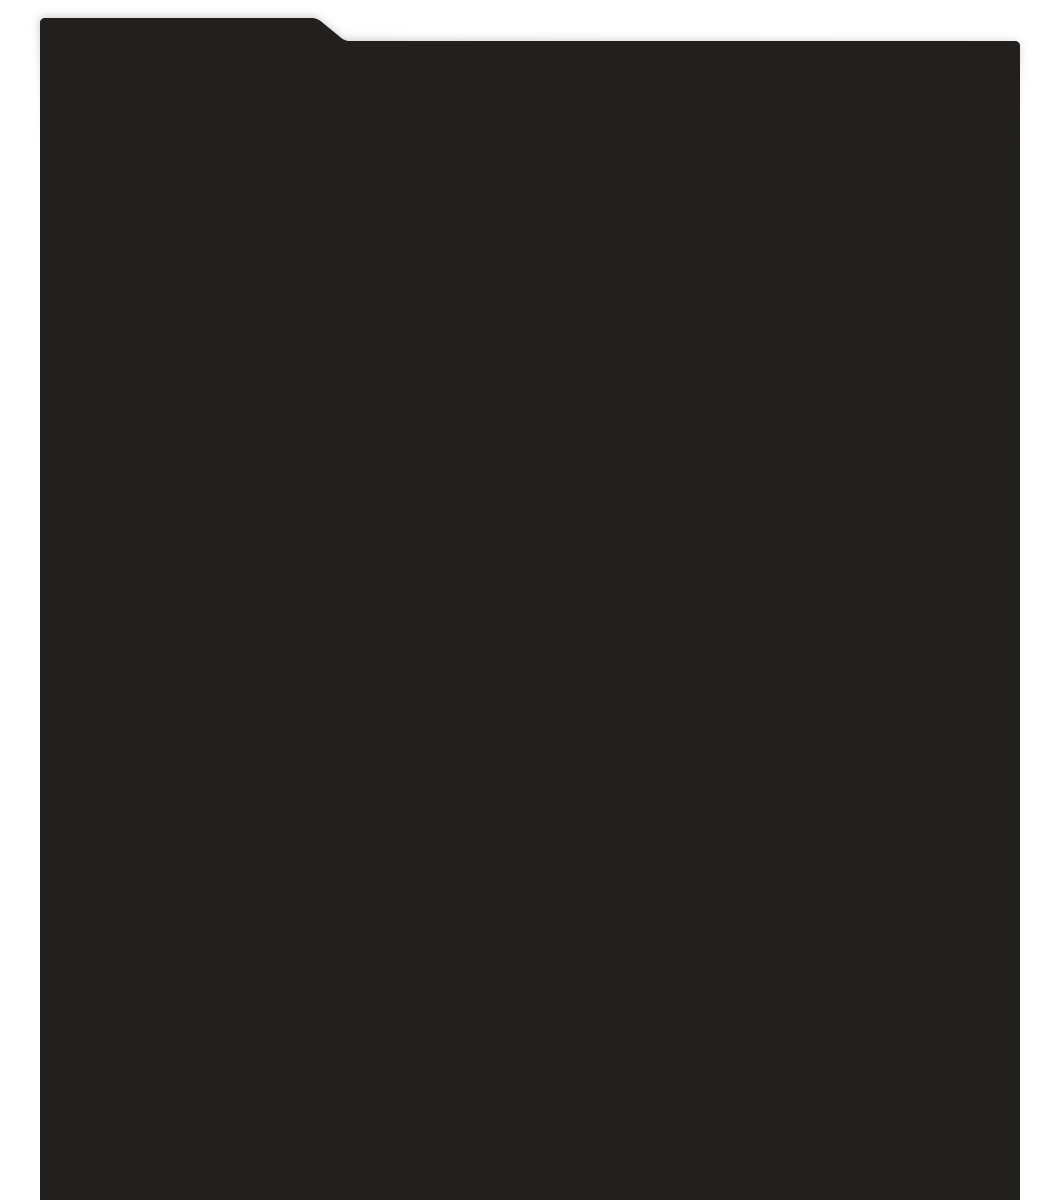
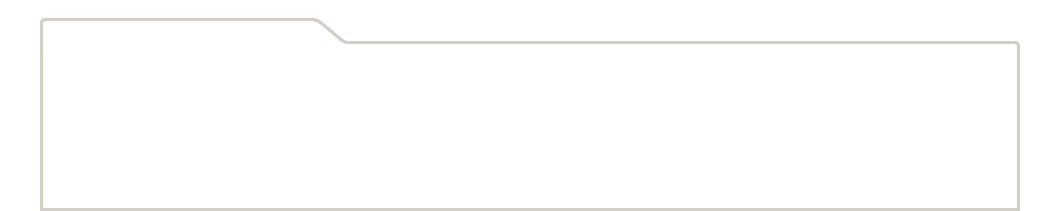
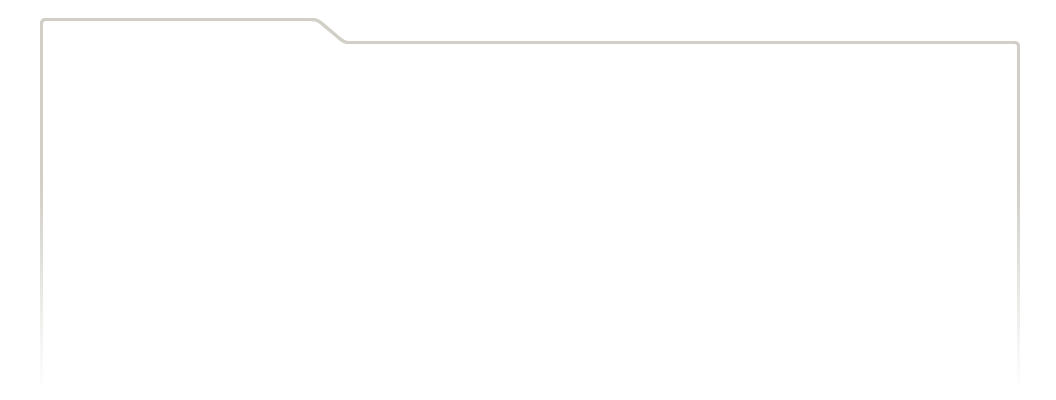
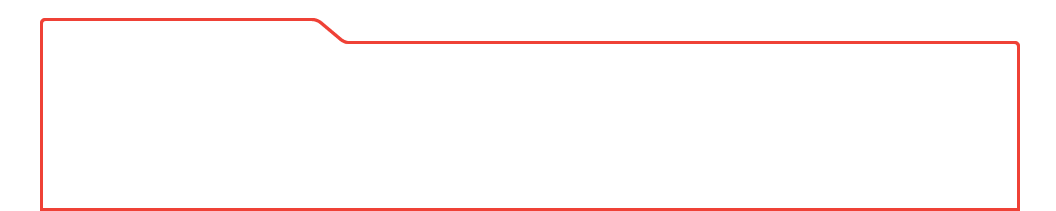
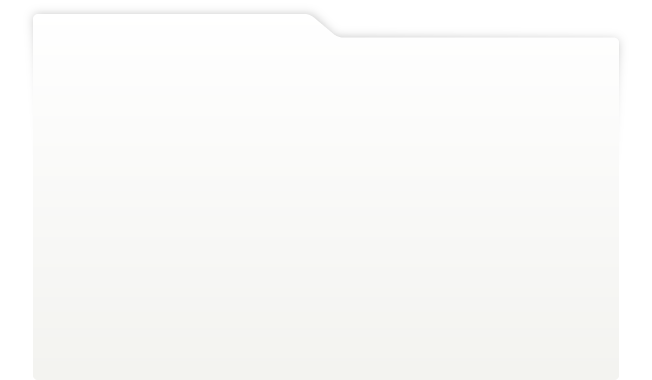
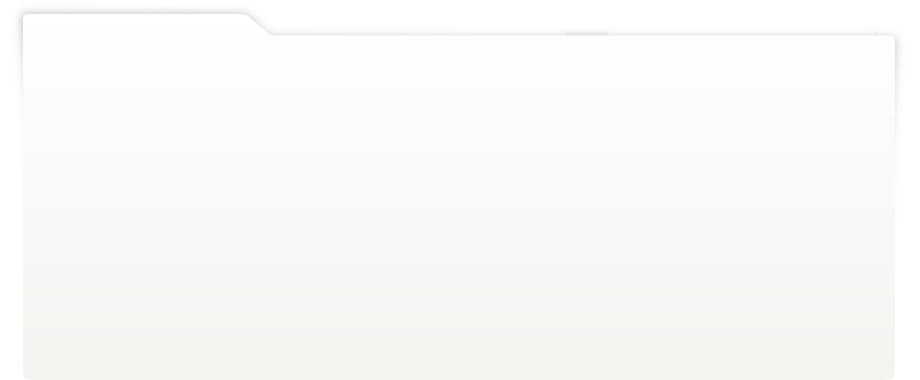
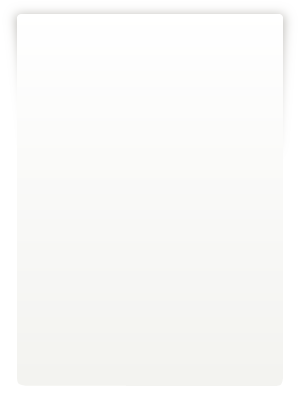
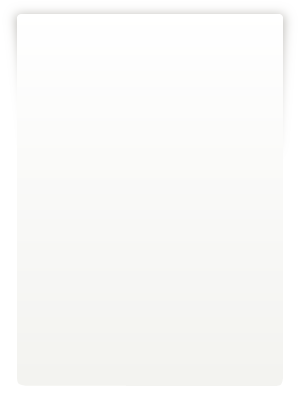
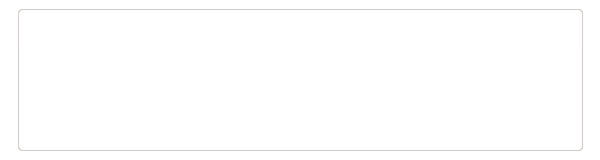
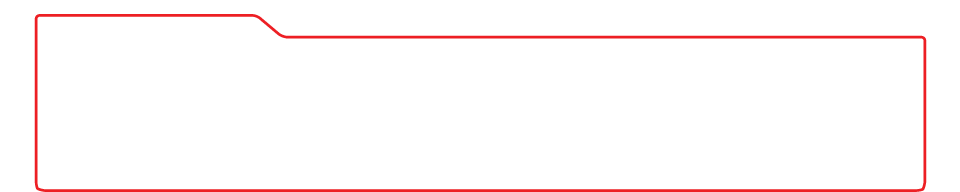
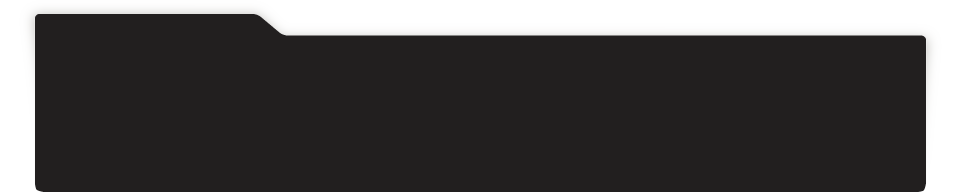
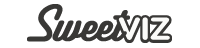
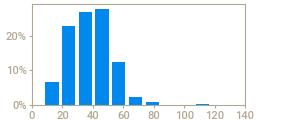
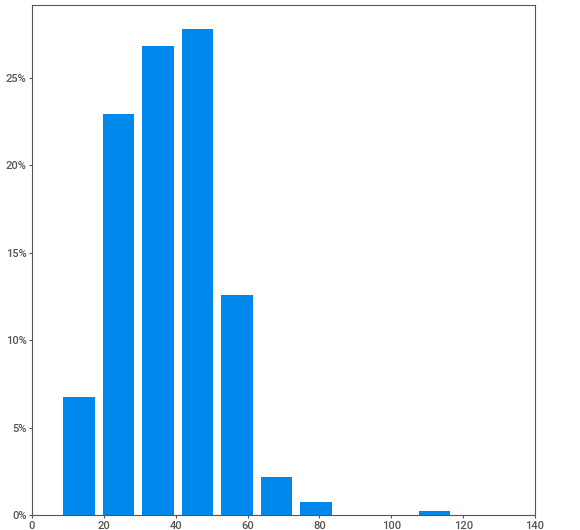
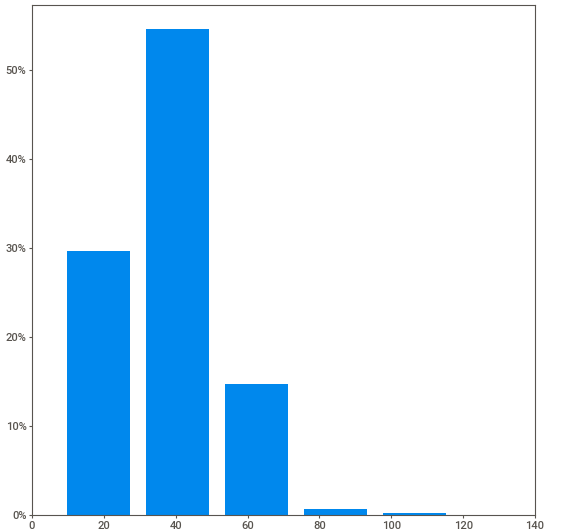
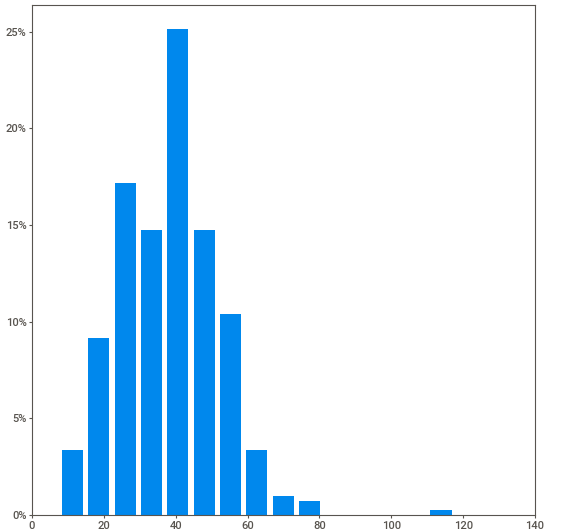
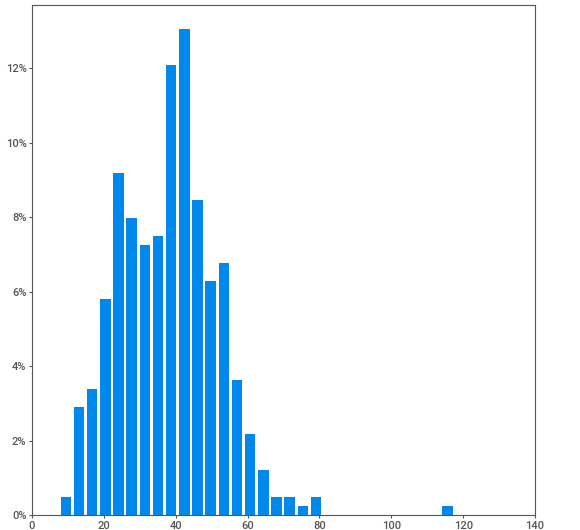
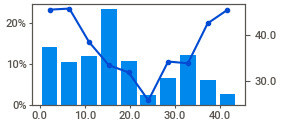
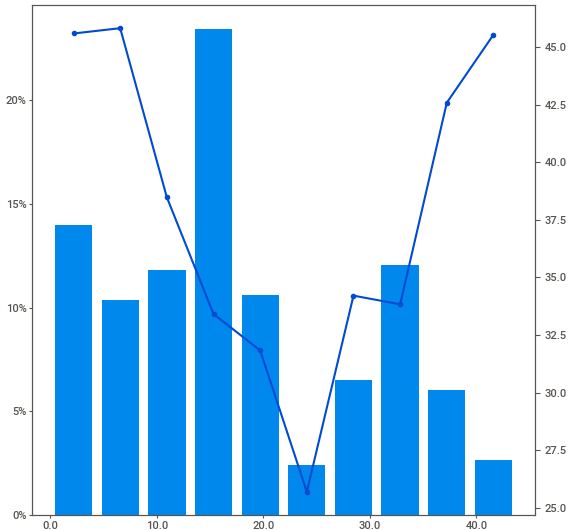
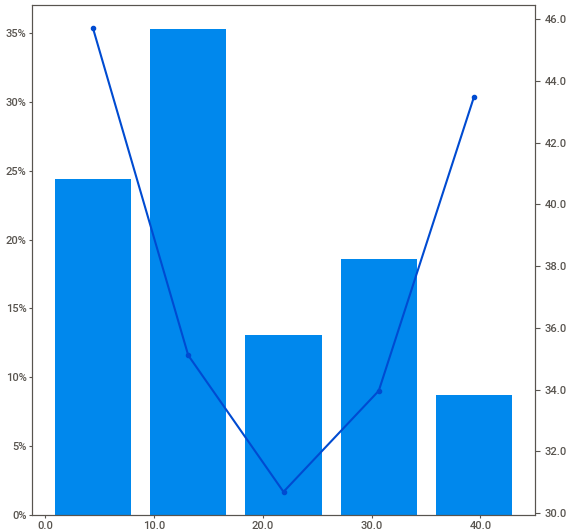
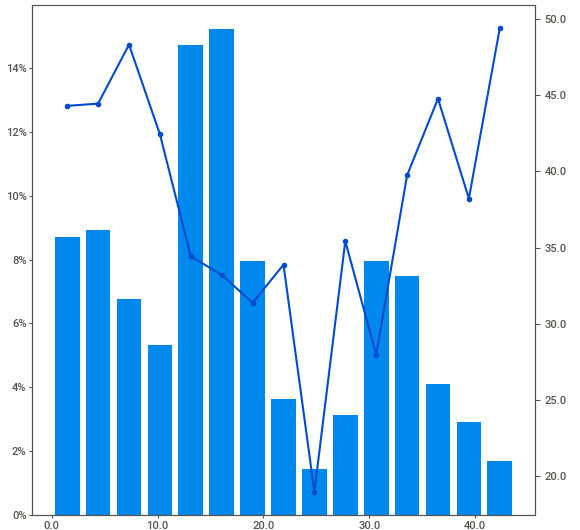
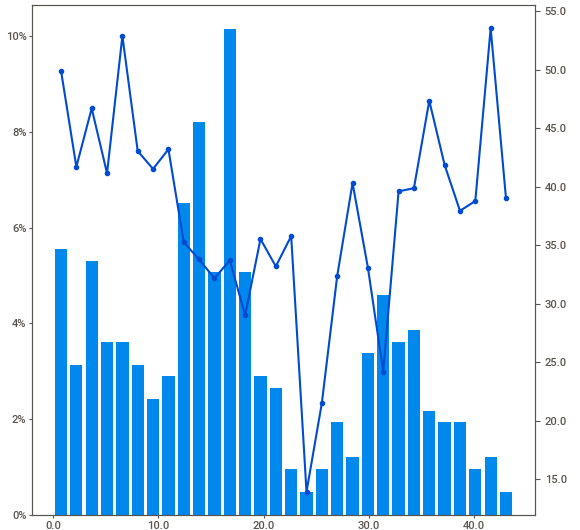
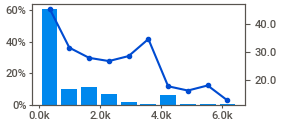
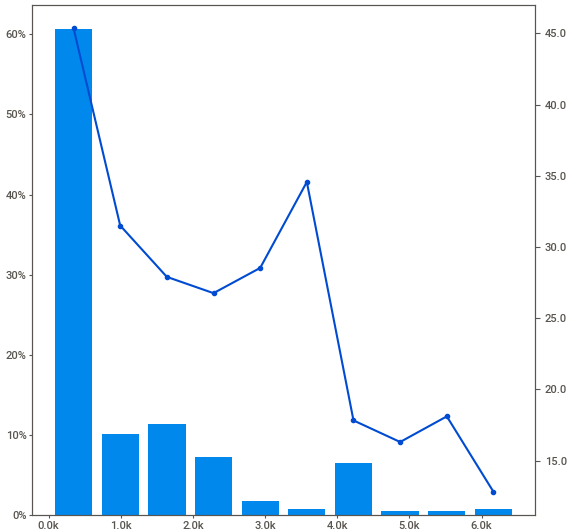
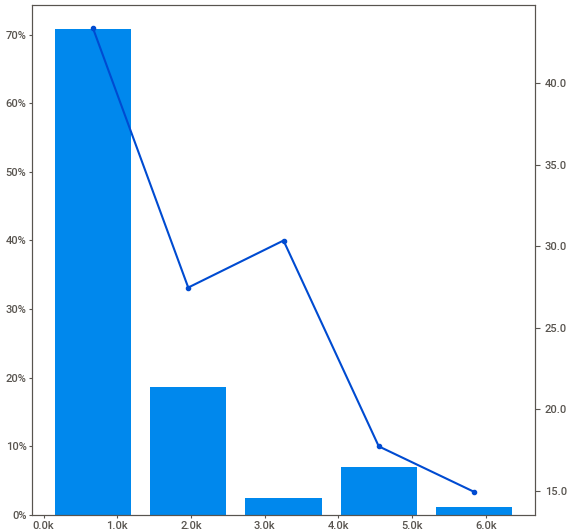
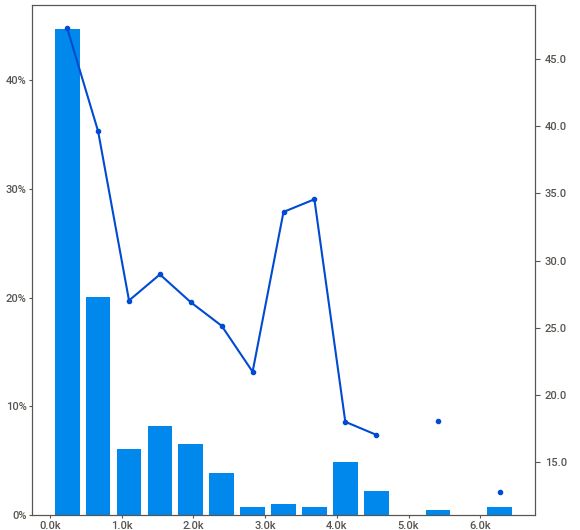
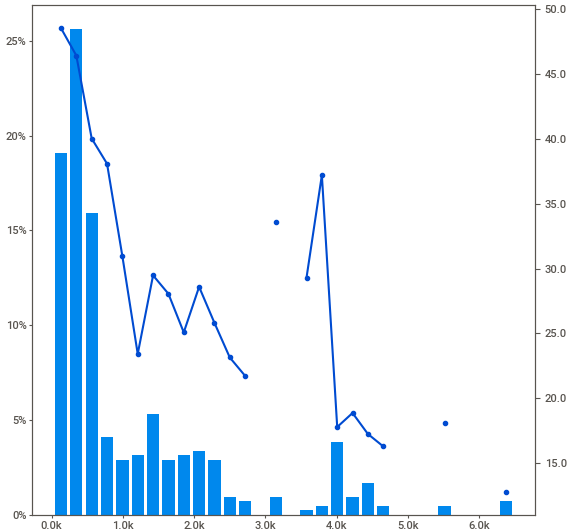
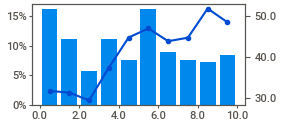
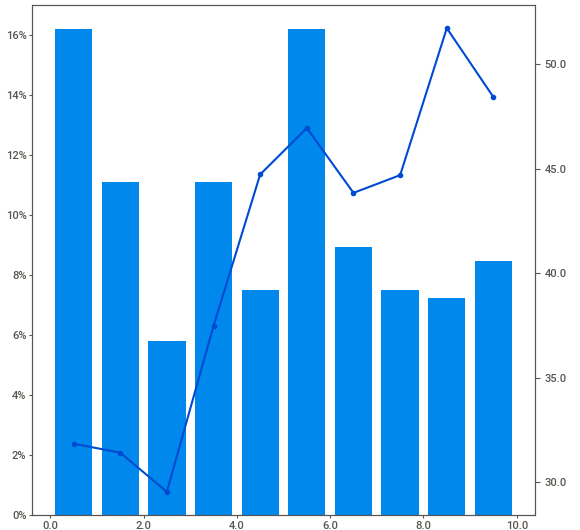
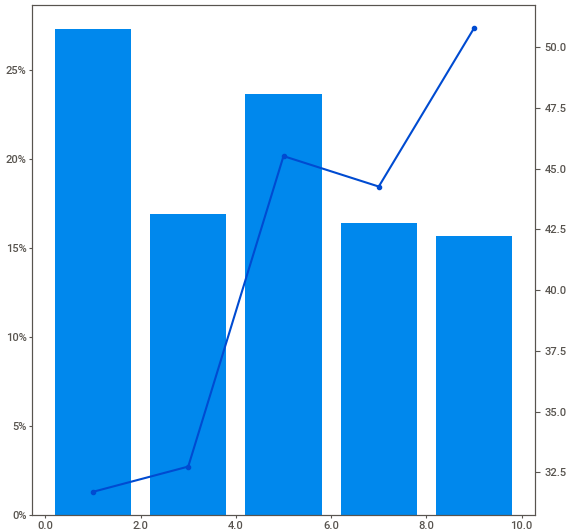
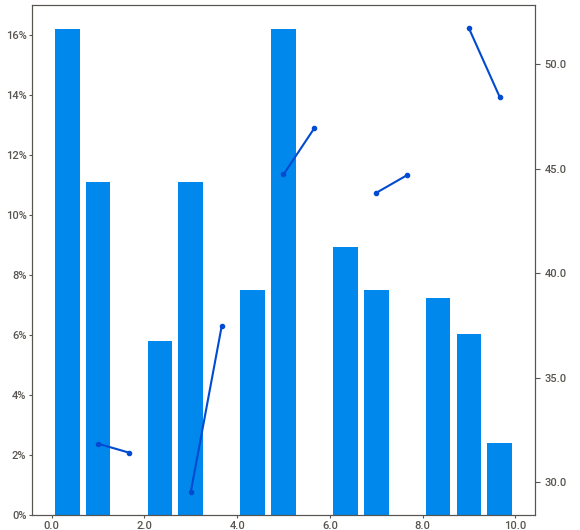
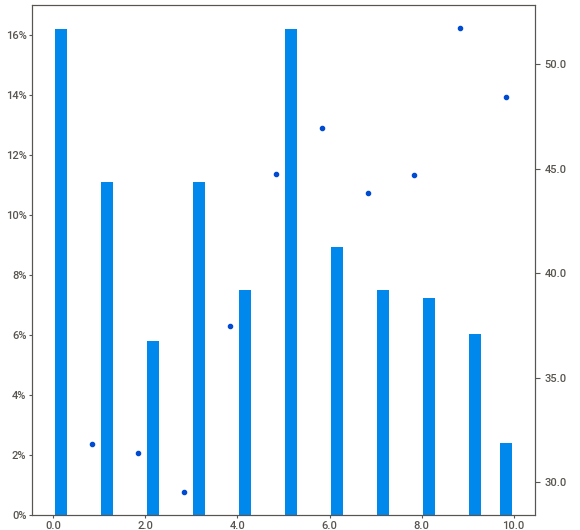
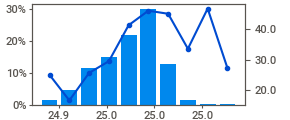
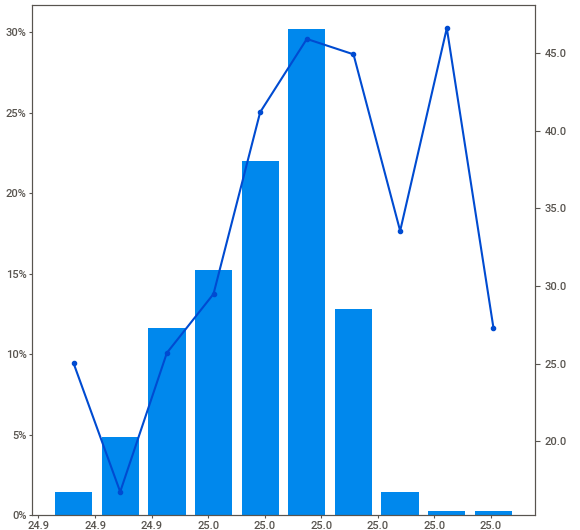
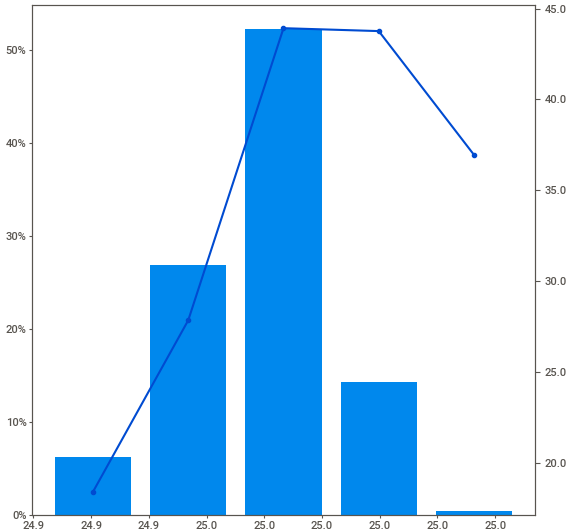
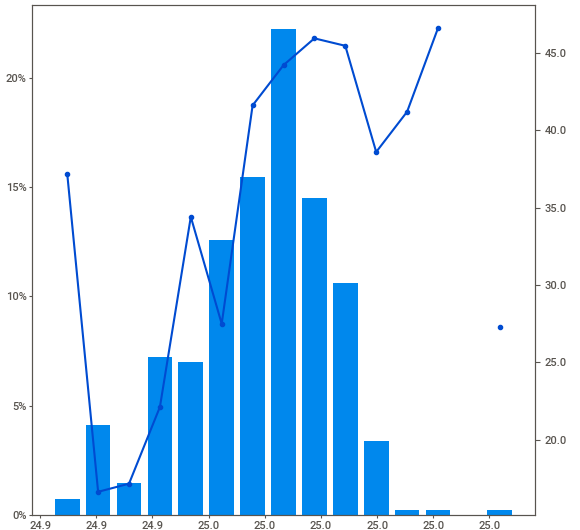
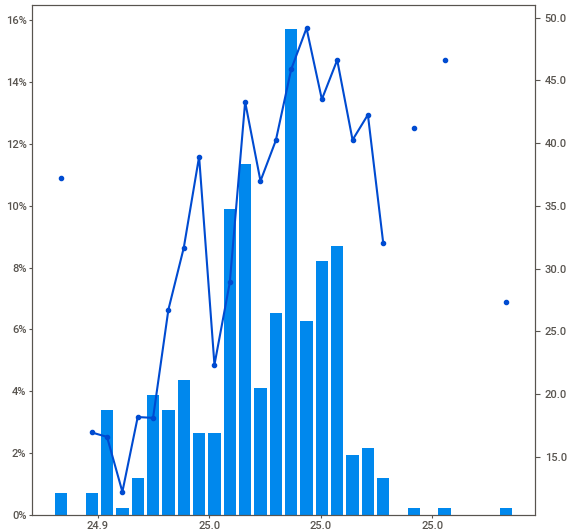
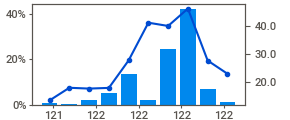
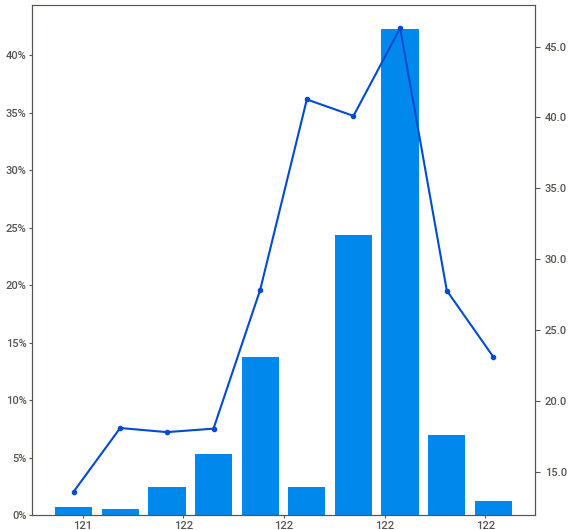
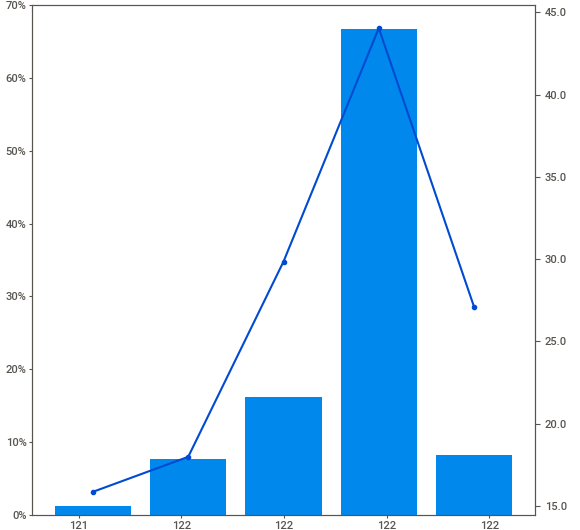
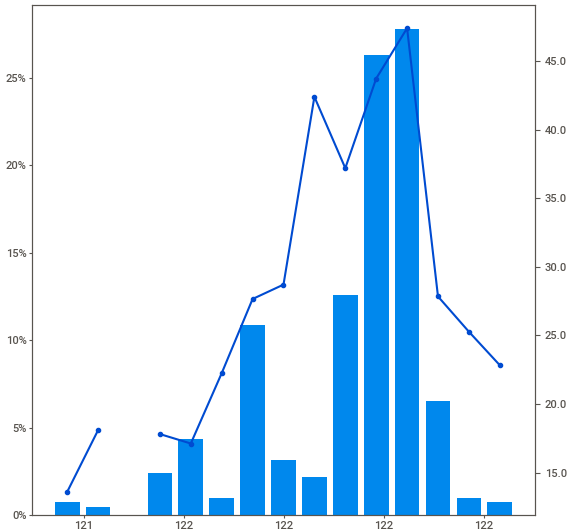
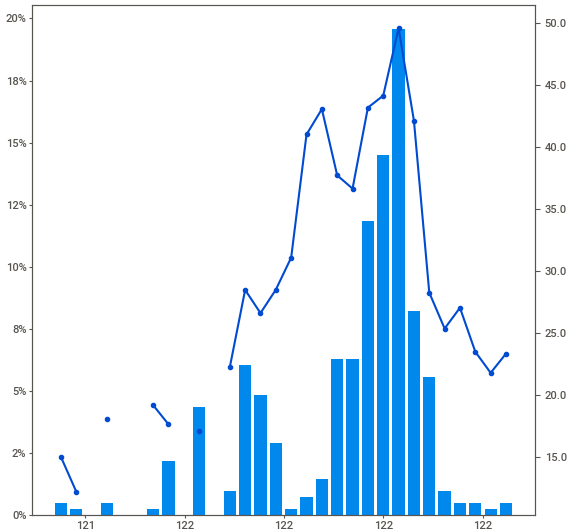
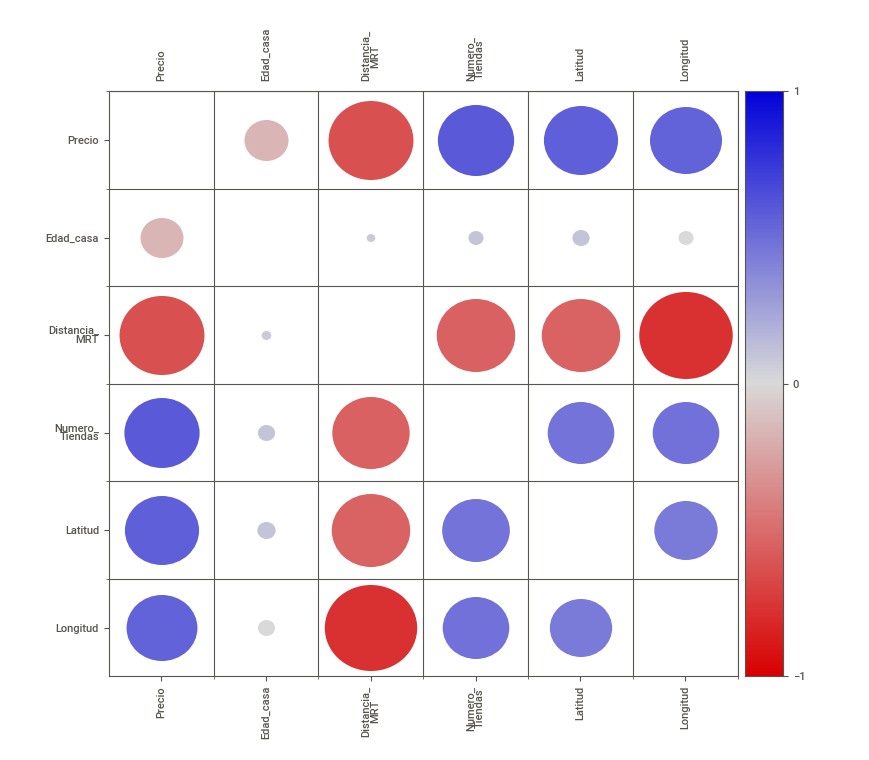
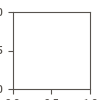

In [15]:
from IPython.display import HTML
reporte.show_html()
HTML('SWEETVIZ_REPORT.html')

In [16]:
X = data.drop('Precio',axis=1)
y = data['Precio']


In [25]:
X

,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [18]:
X.shape

(414, 5)

In [19]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Precio, Length: 414, dtype: float64

In [20]:
#Split train and test
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1) # 75 - 25 split   (test_size=0.25)
X_train.shape, X_test.shape


((310, 5), (104, 5))

In [29]:

model = XGBRegressor()


In [30]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

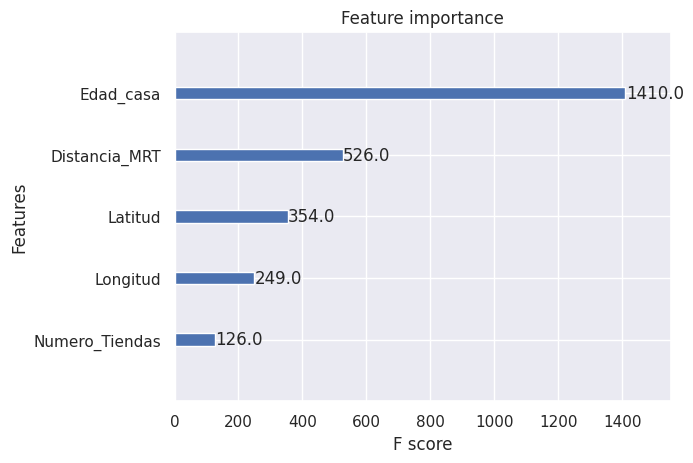

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(model, ax=plt.gca())

<Axes: xlabel='Edad_casa', ylabel='Precio'>

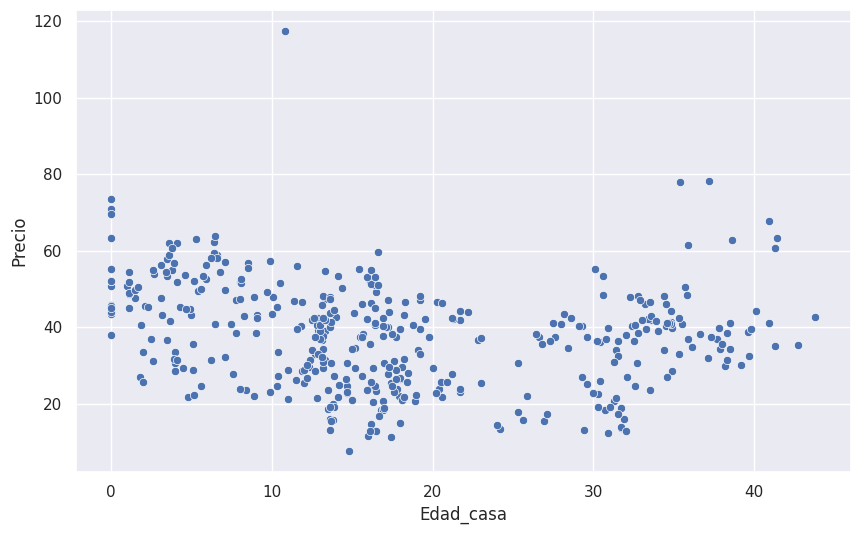

In [32]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="Edad_casa", y="Precio")

<Axes: xlabel='Numero_Tiendas', ylabel='Precio'>

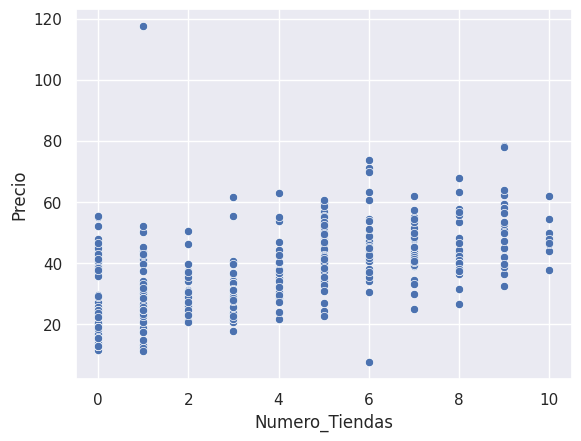

In [33]:
import seaborn as sns

sns.scatterplot(data=data, x="Numero_Tiendas", y="Precio")

In [34]:
data.columns

Index(['Edad_casa', 'Distancia_MRT', 'Numero_Tiendas', 'Latitud', 'Longitud',
       'Precio'],
      dtype='object')

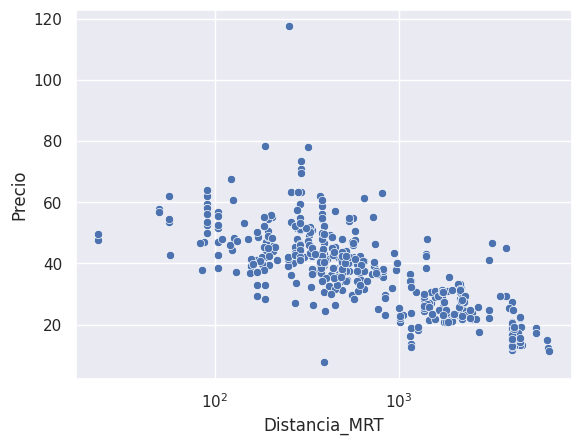

In [35]:
sns.scatterplot(data=data, x='Distancia_MRT', y="Precio")
plt.xscale("log")

## Prediccion de nuevos valoress

In [36]:
predicciones = model.predict(X_test)
predicciones[0:10] # las 10 primeras


array([23.50063 , 47.643   , 26.308422, 12.965963, 94.14111 , 30.438053,
       27.1464  , 34.468307, 42.579712, 13.944125], dtype=float32)

In [37]:
X_test.iloc[0]


Edad_casa           10.40000
Distancia_MRT     2251.93800
Numero_Tiendas       4.00000
Latitud             24.95957
Longitud           121.51353
Name: 388, dtype: float64

In [38]:
y_test.iloc[0]

27.3

### Model Error
Training MSE

In [39]:
pred_train = model.predict(X_train)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score  
print( r2_score(y_train, pred_train) ) 

0.9915845035963384


In [41]:
print( mean_squared_error(y_train, pred_train) )  


1.5700161274969948


## Testing MSE


In [42]:
model.score(X_test, y_test)  ## R^2


0.3691885757843456

In [43]:
print(r2_score(y_test, predicciones))
print(mean_squared_error(y_test, predicciones))


0.3691885757843456
111.38164298153998


¿Qué puede concluir sobre las metricas?




¿Qué hacer?
- Eliminar los valores atípicos de la unidad de precio de la vivienda
-Añadir fechas como el año y el mes, el día ?
- Cambiar el tamaño de la división entrenamiento-test (test_size=0,33)
- Optimizar los hiperparámetros
- Ejecutar la validación cruzada

In [44]:
data1= pd.read_excel(url)
data1

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [45]:
data1=data1.drop("No", axis=1)


In [46]:
data1

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [47]:
data1.columns = ["Fecha", 'Edad_casa','Distancia_MRT','Numero_Tiendas','Latitud','Longitud','Precio']

In [48]:
data1

,Fecha,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha           414 non-null    float64
 1   Edad_casa       414 non-null    float64
 2   Distancia_MRT   414 non-null    float64
 3   Numero_Tiendas  414 non-null    int64  
 4   Latitud         414 non-null    float64
 5   Longitud        414 non-null    float64
 6   Precio          414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [50]:
from datetime import datetime

data1['Fecha_1'] =  pd.to_datetime(data1['Fecha'], format='%Y')

data1['year'] = pd.DatetimeIndex(data1['Fecha_1']).year

data1.head()

,Fecha,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio,Fecha_1,year
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012


In [51]:
import math
data1['month'],data1['year2'] =  data1['Fecha'].apply(lambda x: math.modf(x)).str

<ipython-input-51-00a888b4d06c>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['month'],data1['year2'] =  data1['Fecha'].apply(lambda x: math.modf(x)).str


In [52]:
data1

,Fecha,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio,Fecha_1,year,month,year2
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,0.916667,2012.0
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,0.916667,2012.0
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,0.583333,2013.0
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,0.500000,2013.0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,0.833333,2012.0
...,...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4,2013-01-01,2013,0.000000,2013.0
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0,2012-01-01,2012,0.666667,2012.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6,2013-01-01,2013,0.250000,2013.0
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5,2013-01-01,2013,0.000000,2013.0


In [53]:
data1['year2'] = ( data1['year2']).astype(int)


In [54]:
data1['month'] = data1['month']*12
data1.head()


,Fecha,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio,Fecha_1,year,month,year2
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11.0,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11.0,2012
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,7.0,2013
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6.0,2013
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,10.0,2012


In [55]:
data1['day'],data1['month'] =  data1['month'].apply(lambda x: math.modf(x)).str


<ipython-input-55-9c244e213b5f>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['day'],data1['month'] =  data1['month'].apply(lambda x: math.modf(x)).str


In [56]:
data1.head()


,Fecha,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio,Fecha_1,year,month,year2,day
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11.0,2012,3.999994e-07
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11.0,2012,3.999994e-07
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6.0,2013,9.999996e-01
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6.0,2013,0.000000e+00
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9.0,2012,9.999996e-01


In [57]:
data1['month'] = ( data1['month']).astype(int)

data1['day'] = ( data1['day']*30 + 1).astype(int)

In [58]:
data1.head()

,Fecha,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio,Fecha_1,year,month,year2,day
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012-01-01,2012,11,2012,1
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012-01-01,2012,11,2012,1
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013-01-01,2013,6,2013,30
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013-01-01,2013,6,2013,1
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012-01-01,2012,9,2012,30


In [60]:
data1 = data1.drop(['Fecha','Fecha_1','year2'],axis=1)

In [61]:
data1

,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,30
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,30
...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,0,1
410,5.6,90.45606,9,24.97433,121.54310,50.0,2012,8,1
411,18.8,390.96960,7,24.97923,121.53986,40.6,2013,3,1
412,8.1,104.81010,5,24.96674,121.54067,52.5,2013,0,1


- Outliers

<Axes: xlabel='Precio', ylabel='Count'>

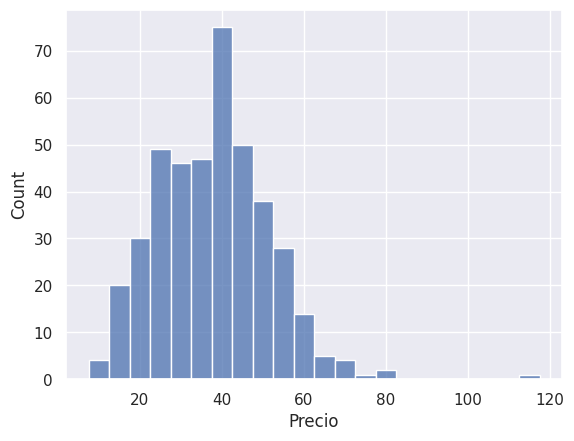

In [59]:
sns.histplot(data=data1,x="Precio")

<Axes: ylabel='Precio'>

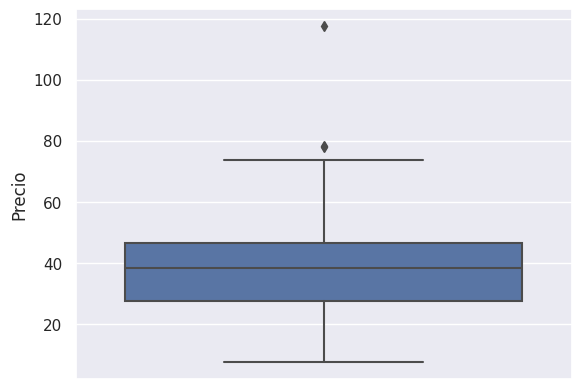

In [62]:
sns.boxplot(data=data1, y="Precio")

In [63]:
data1 = data1[ data1['Precio']<90 ]


In [64]:
data1.shape

(413, 9)

<Axes: xlabel='Precio', ylabel='Count'>

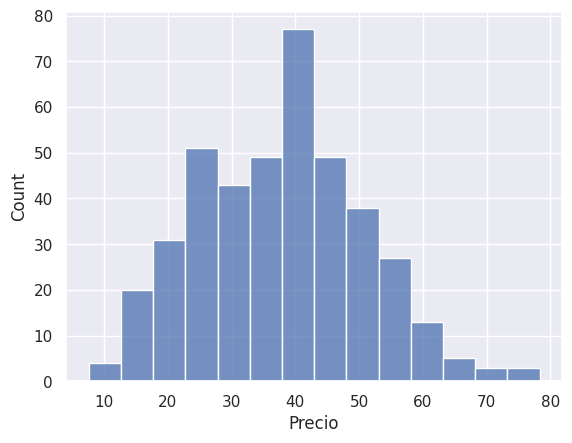

In [65]:
sns.histplot(data=data1, x="Precio")

<Axes: ylabel='Precio'>

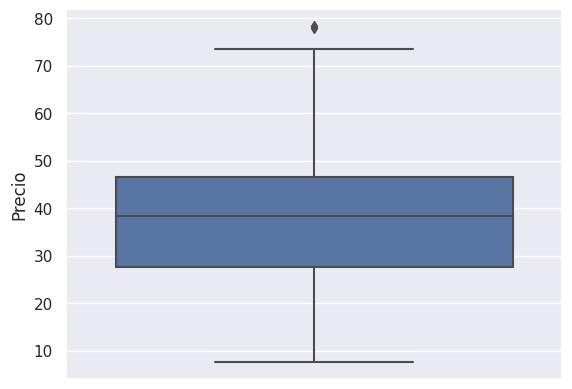

In [66]:
sns.boxplot(data=data1, y="Precio")

In [68]:
#Select variables
X = data1.drop('Precio',axis=1)
y = data1['Precio']



# Split train and test

In [69]:

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)
X_train.shape, X_test.shape


((309, 8), (104, 8))

# Regression Model


In [70]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

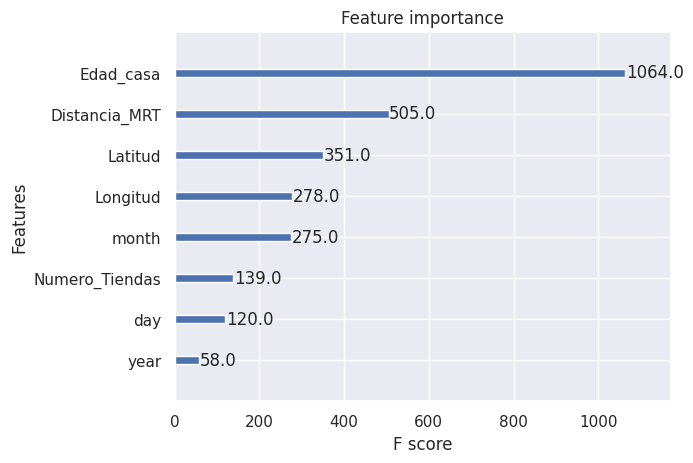

In [71]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

#Train performance


In [72]:
pred_train = model.predict(X_train)


In [73]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE
print(r2_score(y_train, pred_train))
print(mean_squared_error(y_train, pred_train)) 

0.9967961938408723
0.5431973352504631


#Test performance

In [74]:

predictions = model.predict(X_test)
print(r2_score(y_test, predictions))
model.score(X_test, y_test)  # R^2
print(mean_squared_error(y_test, predictions))


0.7417750995831265
44.028456871771695


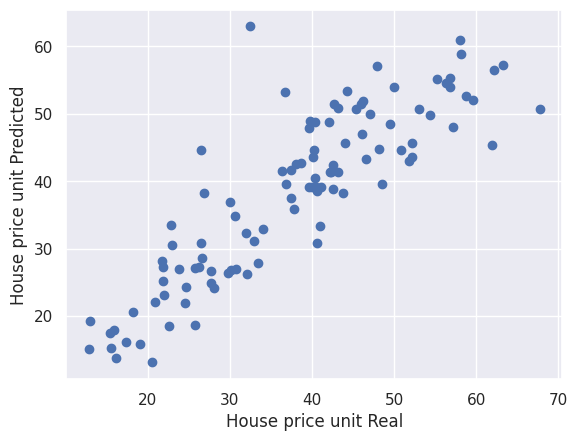

In [75]:
plt.scatter(y_test, predictions)
plt.xlabel("House price unit Real")
plt.ylabel("House price unit Predicted")
plt.show()

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [77]:
data1.head()

,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,30
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,30


Revisemos las correlaciones

In [79]:
matrix_cor=data1.corr()
matrix_cor

,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Longitud,Precio,year,month,day
Edad_casa,1.000000,0.024676,0.048131,0.055119,-0.048822,-0.210985,0.050193,-0.065570,0.026322
Distancia_MRT,0.024676,1.000000,-0.605328,-0.590805,-0.807079,-0.694009,0.017593,0.039912,-0.055431
Numero_Tiendas,0.048131,-0.605328,1.000000,0.445994,0.449239,0.612635,-0.003909,0.021271,-0.030288
Latitud,0.055119,-0.590805,0.445994,1.000000,0.413249,0.563954,0.007404,0.017766,0.029698
Longitud,-0.048822,-0.807079,0.449239,0.413249,1.000000,0.549250,0.013488,-0.066000,0.034311
Precio,-0.210985,-0.694009,0.612635,0.563954,0.549250,1.000000,0.075405,-0.047523,0.052549
year,0.050193,0.017593,-0.003909,0.007404,0.013488,0.075405,1.000000,-0.810458,0.091546
month,-0.065570,0.039912,0.021271,0.017766,-0.066000,-0.047523,-0.810458,1.000000,-0.236143
day,0.026322,-0.055431,-0.030288,0.029698,0.034311,0.052549,0.091546,-0.236143,1.000000


<Axes: >

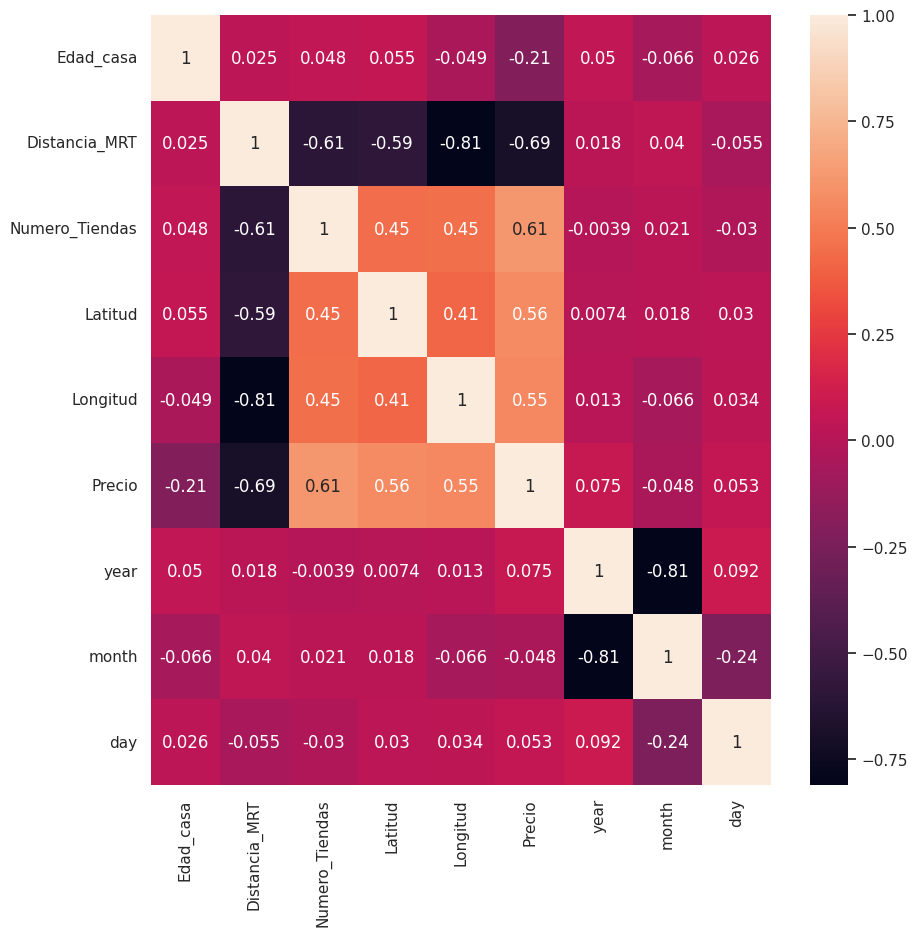

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(matrix_cor, annot=True)

Escriba sus comentarios:

-

-

-

In [81]:
pd.crosstab(data1['year'], columns='count')

col_0,count
year,
2012,126
2013,287


In [82]:
data1.groupby('year')['Precio'].mean()

year
2012    36.304762
2013    38.438676
Name: Precio, dtype: float64

In [83]:
data1.groupby('month')['Precio'].mean()

month
0     36.922973
2     38.304000
3     40.153333
5     38.453448
6     38.607143
8     38.543333
9     35.636207
11    35.557895
Name: Precio, dtype: float64

## Selección de variables con regresión lineal

In [84]:
X = data1.drop('Precio',axis=1)
y = data1['Precio']

In [85]:
X.shape

(413, 8)

In [86]:
y.shape

(413,)

In [87]:
import statsmodels.api as sm
X_constant= sm.add_constant(X)

lin_reg = sm.OLS(y,X_constant).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Precio   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     85.36
Date:                Fri, 12 May 2023   Prob (F-statistic):           5.37e-82
Time:                        22:22:04   Log-Likelihood:                -1441.9
No. Observations:                 413   AIC:                             2902.
Df Residuals:                     404   BIC:                             2938.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.603e+04   6270.120     -2.556      0.011   -2.84e+04   -3699.960
Edad_casa         -0.2640      0.035     -7.528      0.000      -0.333      -0.195
Distancia_MRT     -0.0038      0.001     -5.833      0.000      -0.005      -0.003
Numero_Tiendas     1.3095      0.172      7.599      0.000       0.971       1.648
Latitud          225.0145     40.538      5.551      0.000     145.323     304.706
Longitud          15.9548     44.223      0.361      0.718     -70.982     102.892
year               4.2272      1.507      2.806      0.005       1.265       7.189
month              0.2815      0.206      1.366      0.173      -0.124       0.687
day                0.0427      0.031      1.383      0.167      -0.018       0.103
==============================================================================
Omnibus:                       60.884   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.239
Skew:                           0.718   Prob(JB):                     2.64e-35
Kurtosis:                       5.682   Cond. No.                     3.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
data1.columns

Index(['Edad_casa', 'Distancia_MRT', 'Numero_Tiendas', 'Latitud', 'Longitud',
       'Precio', 'year', 'month', 'day'],
      dtype='object')

<Axes: xlabel='Longitud', ylabel='Latitud'>

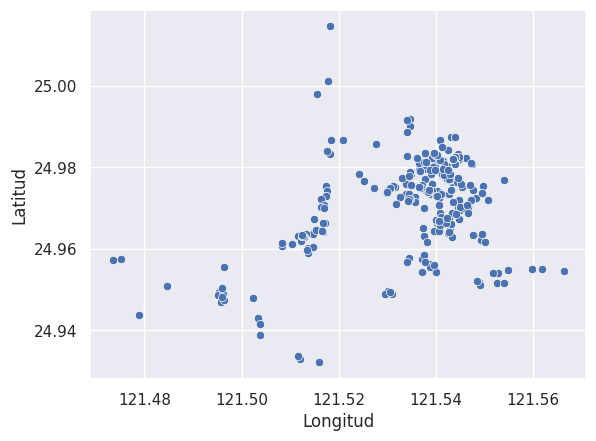

In [89]:
sns.scatterplot(data=data1, x="Longitud", y="Latitud")

- Selección de variables con eliminación recursiva de características

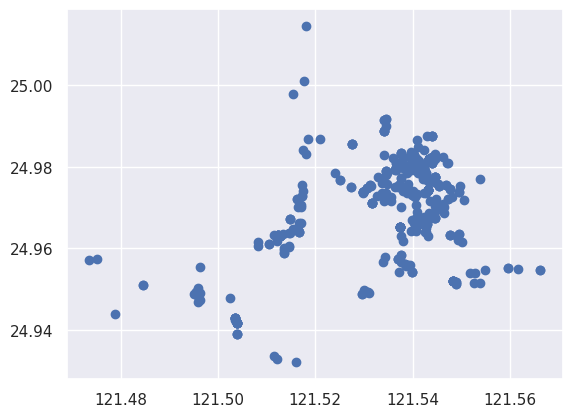

In [95]:
plt.plot(data1.Longitud, data1.Latitud, 'o')


In [96]:
from sklearn.feature_selection import RFECV

model = XGBRegressor()

selector= RFECV( model, step=1, min_features_to_select=3, cv=4 ,  verbose=0) ## cv cross validation

selector.fit(X,y)


RFECV(cv=4,
      estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, early_stopping_rounds=None,
                             enable_categorical=False, eval_metric=None,
                             feature_types=None, gamma=None, gpu_id=None,
                             grow_policy=None, importance_type=None,
                             interaction_constraints=None, learning_rate=None,
                             max_bin=None, max_cat_threshold=None,
                             max_cat_to_onehot=None, max_delta_step=None,
                             max_depth=None, max_leaves=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, n_estimators=100,
                             n_jobs=None, num_parallel_tree=None,
                             predictor=None, random_state=None, ...),
      min_features_to_select=3)

In [91]:
print(X.columns)

Index(['Edad_casa', 'Distancia_MRT', 'Numero_Tiendas', 'Latitud', 'Longitud',
       'year', 'month', 'day'],
      dtype='object')


In [92]:
print( selector.ranking_)  

[1 1 1 1 1 1 2 1]


In [98]:
print(selector.grid_scores_.mean())   

AttributeError: ignored

In [99]:
print(selector.cv)

4


In [100]:
data2= data1.drop(['Longitud','day','year'], axis=1) 
data2

,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Precio,month
0,32.0,84.87882,10,24.98298,37.9,11
1,19.5,306.59470,9,24.98034,42.2,11
2,13.3,561.98450,5,24.98746,47.3,6
3,13.3,561.98450,5,24.98746,54.8,6
4,5.0,390.56840,5,24.97937,43.1,9
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,15.4,0
410,5.6,90.45606,9,24.97433,50.0,8
411,18.8,390.96960,7,24.97923,40.6,3
412,8.1,104.81010,5,24.96674,52.5,0


### Split train and test

In [101]:
X = data2.drop('Precio',axis=1)
y = data2['Precio']
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)
from xgboost import XGBRegressor

model = XGBRegressor(gpu_id=0)  ## gpu_id=-1 if not gpu

model.fit(X_train, y_train)

[22:23:46] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score  
pred_train = model.predict(X_train)
print("R^2 train: ", r2_score(y_train, pred_train))  ## model.score
print("MSE train ", mean_squared_error(y_train, pred_train) ) 

R^2 train:  0.9959861380100866
MSE train  0.6805402788718088


In [103]:
pred_test = model.predict(X_test)
print("R^2 test: ", model.score(X_test, y_test) ) ## R^2
print("MSE test ", mean_squared_error(y_test, pred_test) )


R^2 test:  0.7560528183024308
MSE test  41.59404438155354


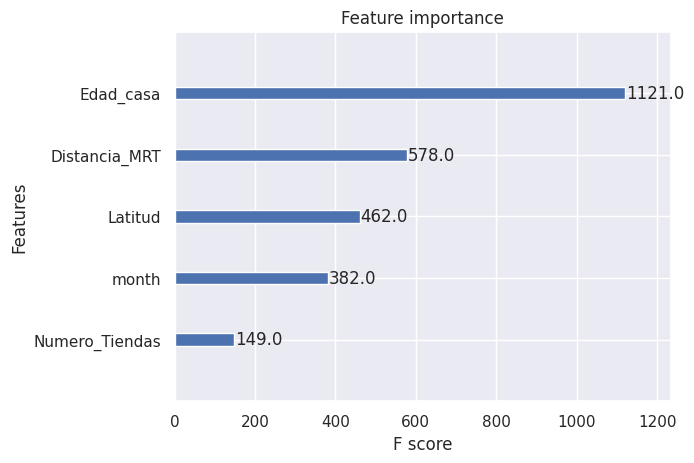

In [104]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()


Cross validation


In [105]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5).mean()  ## Ya ejecutado en RFECV pero con mas variables (mean: 0.69)
scores

[22:24:10] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:11] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:11] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:11] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:11] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1


0.6880749232359664

In [106]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


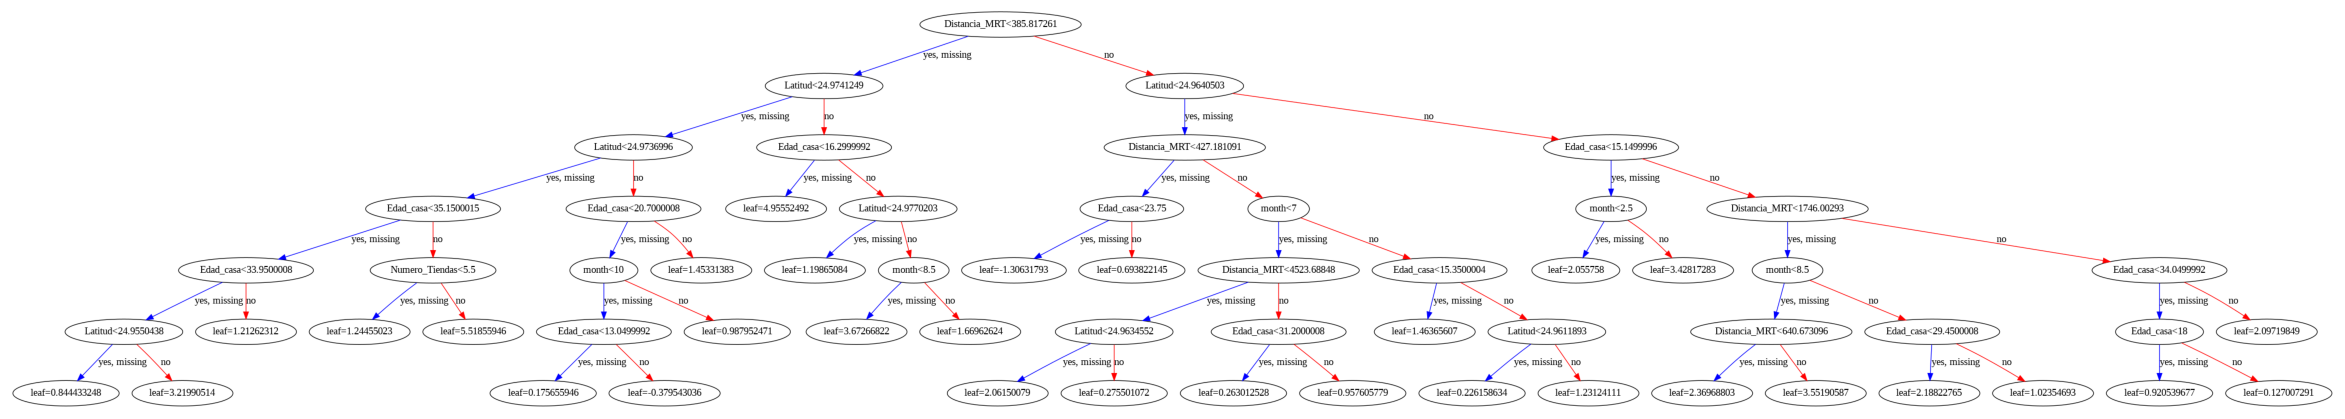

In [107]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

# Hiperparametros
https://xgboost.readthedocs.io/en/latest/parameter.html

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split

data2.head()

,Edad_casa,Distancia_MRT,Numero_Tiendas,Latitud,Precio,month
0,32.0,84.87882,10,24.98298,37.9,11
1,19.5,306.59470,9,24.98034,42.2,11
2,13.3,561.98450,5,24.98746,47.3,6
3,13.3,561.98450,5,24.98746,54.8,6
4,5.0,390.56840,5,24.97937,43.1,9


- **Split train and test**

In [109]:
X = data2.drop('Precio',axis=1)
y = data2['Precio']
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =1)


Hyperparameter tunning

In [110]:
model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import GridSearchCV

xgbr = XGBRegressor(gpu_id=0,learning_rate=0.3, max_depth=6, n_estimators=100,subsample=0.8)  # gpu_id=-1

# conjunto de parametros cross-validation


tuned_parameters = {
   'max_depth':[3,4,5,6],
   'min_child_weight':[1,2,3,4,5,6],
   'gamma':[i/10.0 for i in range(0,5)], 
   'learning_rate':[0.01,0.05,0.1,0.2]  #, 'n_estimators':[100, 500,1000]
}

clf = GridSearchCV(xgbr, param_grid = tuned_parameters,cv=5)
clf.fit(X_train, y_train)

print("El mejor conjunto de parámetros encontrado en el conjunto de desarrollo:")
print( clf.best_params_)
print("Mejor puntuación encontrada en el conjunto de desarrollo:")
print( clf.best_score_)



[22:24:41] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:41] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:42] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:42] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:43] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:43] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:43] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:44] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:44] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:45] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[22:24:45] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1

In [ ]:
xgbr.objective

In [ ]:
model= XGBRegressor(gpu_id=0,learning_rate=0.05, gamma=0.3,max_depth=3, n_estimators=100,subsample=0.8, min_child_weight=3)

In [ ]:
model.fit(X_train, y_train)


In [ ]:
xgb.plot_importance(model, ax=plt.gca())
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE
pred_train = model.predict(X_train)
print("R^2 train: ", r2_score(y_train, pred_train))  ## model.score
print("MSE train ", mean_squared_error(y_train, pred_train) ) 

In [ ]:
pred_test = model.predict(X_test)
print("R^2 test: ", model.score(X_test, y_test) ) ## R^2
print("MSE test ", mean_squared_error(y_test, pred_test) )